## Ali obstaja korelacija z visoko prodajo alkohola, in številom prometnih nesreč v določenih mesecih?

In [1]:
# Relevantni importi
% matplotlib inline
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from Orange.data.filter import SameValue
from Orange.data import Table
import numpy as np
from csv import DictReader
import pandas as pd
from collections import defaultdict
import time
import sklearn

In [2]:
# Filtrirani podatki naloženi (crash data filt je isti, ker je tako ali tako cel)
crash1_reader = DictReader(open('data/Crash_Data_1_filt.csv', 'rt', encoding='utf-8'))
crash2_reader = DictReader(open('data/Crash_Data_2_filt_non_rand.csv', 'rt', encoding='utf-8'))
liquor_reader = DictReader(open('data/Liquor_Data_filt_non_rand.csv', 'rt', encoding='utf-8'))

Potrebujem konsistentne mesece po letih. Ker se merjenje podatkov lahko začne
na sredini nekega leta in konča na sredini drugega leta, teh let ne upoštevam.

In [3]:
start = time.clock()
leto = defaultdict(list)
for i in range(2012, 2019):
    leto[i] = [False] * 12
    
for i, liquor in enumerate(liquor_reader):
    try:
        datum = pd.DatetimeIndex([liquor['Date']])
        mesec = datum.month[0]
        leto[datum.year[0]][mesec - 1] = True
    except Exception as e:
        pass
    
end = time.clock()
    

In [4]:
# print(leto)
columns = [i for i in range(2012, 2019)]
df = pd.DataFrame(data = leto)
# print(df)


years = {}
for col in columns:
    years[col] = np.sum([df[col] == True])
    
# shranim pravilne 
correct_years_liquor_binary = [1 if years[i] == 12 else 0 for i in range(2012, 2019)]
correct_years_liquor = [i for i in years.keys() if years[i] == 12]

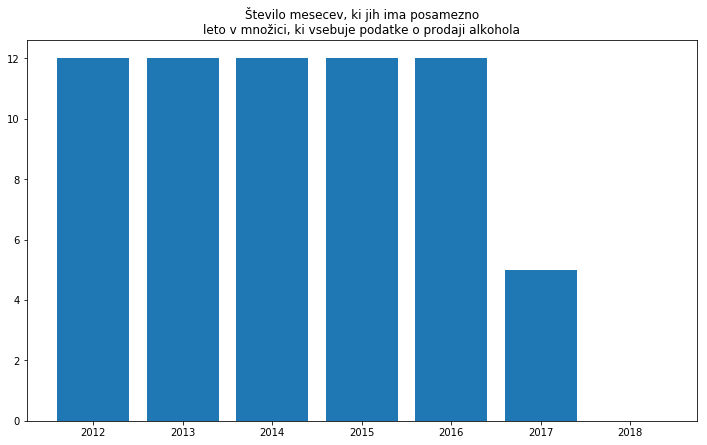

In [372]:
plt.figure(figsize=(12,7))
plt.bar(range(len(years)), years.values(), align='center')
plt.xticks(range(len(years)), years.keys())
plt.title('Število mesecev, ki jih ima posamezno' + "\n" 'leto v množici, ki vsebuje podatke o prodaji alkohola')
plt.show()
#print(end-start)

Torej upoštevamo samo prodajo alkohola po mesecih od leta **2012** do **2016**.

**Shranjevanje relevantnih podatkov**

In [6]:
alkohol_kolicina = defaultdict(float)
alkohol_denar = defaultdict(float)

In [7]:
liquor_reader = DictReader(open('data/Liquor_Data_filt_non_rand.csv', 'rt', encoding='utf-8'))
start = time.clock()
for i, liquor in enumerate(liquor_reader):
    try:
        datum = pd.DatetimeIndex([liquor['Date']])
        # če leto ni pravilno, preskočim
        if datum.year[0] not in correct_years_liquor:
            continue
        # za vsak mesec shranim količino(v litrih in $) prodanega alkohola
        mesec = datum.month[0]
        
        cena = liquor['Sale (Dollars)'].strip("$")
        alkohol_kolicina[mesec] += float(liquor['Volume Sold (Liters)'])
        alkohol_denar[mesec]    += float(cena)
    except Exception as e:
        print(e)
        pass
        
end = time.clock()

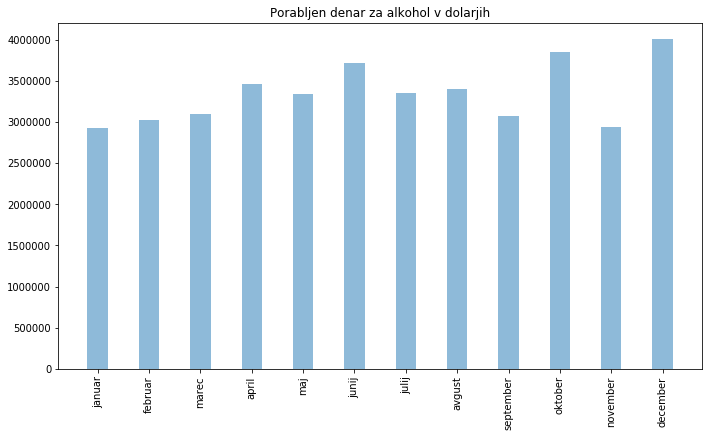

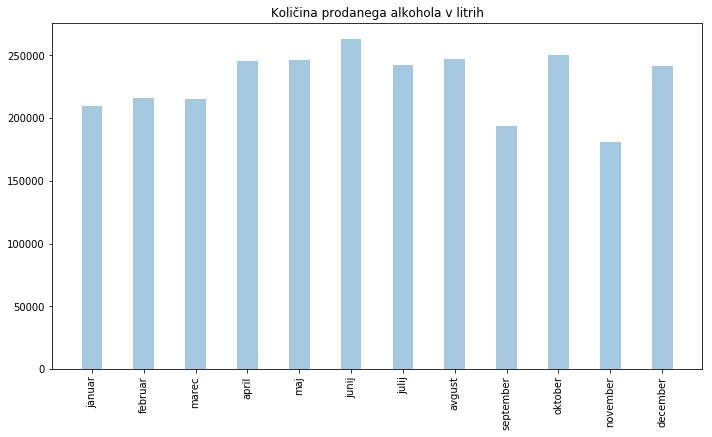

In [369]:
meseci = ['januar', 'februar', 'marec', 'april', 'maj', 'junij', 'julij', 'avgust', 'september', 'oktober', 'november', 'december']

cash = []
months = []
alc = []
for mesec, _ in sorted(alkohol_kolicina.items()):
    cash.append(alkohol_denar[mesec])
    months.append(mesec)
    alc.append(alkohol_kolicina[mesec])
    
xlen= range(len(months))

# cash = sorted(cash)
plt.figure(figsize=(10,6))
plt.bar(meseci, cash, align="center", width = 0.4, alpha = 0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Porabljen denar za alkohol v dolarjih")
plt.show()

plt.figure(figsize=(10,6))
plt.bar(meseci, alc, align="center", width = 0.4, alpha = 0.4)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Količina prodanega alkohola v litrih")
plt.show()

Priprava podatkovne strutuke za nesreče

In [9]:
# bo vseboval podatke v obliki [[crash_date, drugalc, fatalities, propdmg]]
crashes1 = []
# bo vseboval podatke v obliki [[crash_year, alcresult]]
crashes2 = []

In [10]:
crash1_reader = DictReader(open('data/Crash_Data_1_filt.csv', 'rt', encoding='utf-8'))
start = time.clock()
for i, crash in enumerate(crash1_reader):
    try:
        datum = pd.DatetimeIndex([crash['CRASH_DATE']])
        # če leto ni pravilno, preskočim
        if datum.year[0] not in correct_years_liquor:
            continue
            
        data = [ crash['CRASH_DATE'], crash['DRUGALC'], crash['FATALITIES'], crash['PROPDMG'] ]
        crashes1.append(data)
    except Exception as e:
        print(e)
        pass
        
end = time.clock()

In [11]:
crash2_reader = DictReader(open('data/Crash_Data_2_filt_non_rand.csv', 'rt', encoding='utf-8'))
start = time.clock()
for i, crash in enumerate(crash2_reader):
    try:
        datum = crash['CRASH_YEAR']
        
        # če leto ni pravilno, preskočim
        if int(datum) not in correct_years_liquor:
            continue
        
            
        data = [ crash['CRASH_YEAR'], crash['ALCRESULT'] ]
        crashes2.append(data)
    except Exception as e:
        print(e)
        pass
        
end = time.clock()

In [12]:
numpy_crashes1 = np.array(crashes1)
numpy_crashes2 = np.array(crashes2)
print(len(numpy_crashes1))
print(len(numpy_crashes2))

146694
147711


In [13]:
numpy_crashes1[0]

array(['2016-01-20T00:00:00.000Z', '8', '0', '6000'], dtype='<U24')

In [14]:
numpy_crashes2[0]

array(['2013', '0'], dtype='<U5')

**Preštejem koliko nesreč se je zgodilo z povečanim alkoholom za vsak mesec**

In [15]:
# bo vseboval podatke v obliki {1: 10, 2: 20}, kar pomeni januar: 10, februar:20
# number_of_alc_related_crashes = defaultdict(int)
# print(numpy_crashes1)
# print(numpy_crashes1.shape)

In [16]:
# for i in range(len )
# b = numpy_crashes1 != '8'
# numpy_crashes1_alcohol_releated = numpy_crashes1[1][1] 
# x = x[x!='e']  # <-- THIS IS THE METHOD
# numpy_crashes1_alcohol_releated


# shranim tiste nesreče, ki so bile pod vplivom alkohola
crashes1_alcohol_releated = []
i = 0
for i in range(len(numpy_crashes1)):
    # 8 pomeni da voznik ni bil pod vplivom alkohola, iščem pa tiste nesreče, kjer je bil voznik alkoholiziran
    if(numpy_crashes1[i][1] != '8'):
        crashes1_alcohol_releated.append(numpy_crashes1[i])
        


In [18]:
# razporedim nesreče po mesecih
crashes1_alcohol_releated_by_months = defaultdict(int)
for date, drugalc, fatalities, propdmg in crashes1_alcohol_releated:
    datum = pd.DatetimeIndex([date])
    mesec = datum.month[0]
#     print(mesec)
    
    crashes1_alcohol_releated_by_months[mesec] += 1

In [20]:
# preverim ali imam točno enako število podatkov
sum(crashes1_alcohol_releated_by_months.values()) == len(crashes1_alcohol_releated)

True

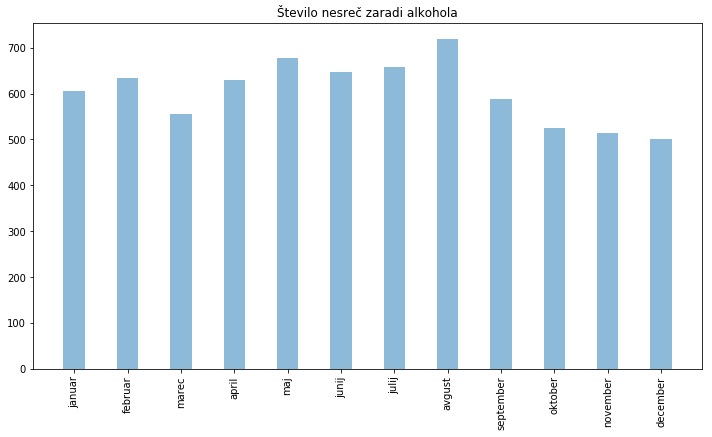

In [368]:
number_of_crashes_monthly = list(crashes1_alcohol_releated_by_months.values())
    
xlen= range(12)
plt.figure(figsize=(10,6))
plt.bar(meseci, number_of_crashes_monthly, align="center", width = 0.4, alpha = 0.5)
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("Število nesreč zaradi alkohola")
plt.show()

In [22]:
# len(crashes1_alcohol_releated)

**Ustvarim vektorje in jih normaliziram, da lahko primerjam korelacijo**

_Izkazalo se je, da normalizacija sploh ni potrebna in dobimo povsem enake rezultate._

In [23]:
# Pripravim funkcijo za normalizcaijo
def normalized(x, max_r, min_r):
    table = []
    for i in range(len(x)):
        table.append( ((max_r - min_r)/(max(x) - min(x))) * (x[i] - max(x)) + max_r )
        
    return table

# Funkcija za pretvorbo float v int
def toInt(x):
    table = []
    for i in range(len(x)):
        table.append(int(x[i]))
        
    return table
        

In [62]:
alkohol_kolicina_by_month_vektor = []
alkohol_denar_by_month_vektor = []
nesrece_alkohol_releated_by_month_vektor = []
for key in sorted(alkohol_kolicina):
#     print(key, alkohol_kolicina[key])
    alkohol_kolicina_by_month_vektor.append(alkohol_kolicina[key])
    
# print()
    
for key in sorted(alkohol_denar):
#     print(key, alkohol_denar[key])
    alkohol_denar_by_month_vektor.append(alkohol_denar[key])
    
for key in sorted(crashes1_alcohol_releated_by_months):
#     print(key, alkohol_denar[key])
    nesrece_alkohol_releated_by_month_vektor.append(crashes1_alcohol_releated_by_months[key])


In [63]:
nesrece_alkohol_releated_by_month_vektor

[606, 556, 634, 630, 678, 647, 658, 718, 589, 526, 500, 515]

In [70]:
# alkohol_denar_by_month_vektor = toInt(alkohol_denar_by_month_vektor)
# alkohol_kolicina_by_month_vektor = toInt(alkohol_kolicina_by_month_vektor)
# print(alkohol_denar_by_month_vektor)
# print(alkohol_kolicina_by_month_vektor)

In [71]:
#Normalized Data
normalized_nesrece_alkohol_releated_by_month_vektor = normalized(nesrece_alkohol_releated_by_month_vektor, 1, 0)
normalized_alkohol_denar_by_month_vektor = normalized(alkohol_denar_by_month_vektor, 1, 0)
normalized_alkohol_kolicina_by_month_vektor = normalized(alkohol_kolicina_by_month_vektor, 1, 0)

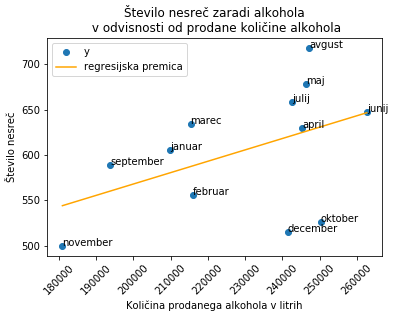

In [387]:
df = pd.DataFrame({'x':alkohol_kolicina_by_month_vektor, 'y':nesrece_alkohol_releated_by_month_vektor})

# print(df)
corr = df.corr()
# df.plot(figsize=(16,9))
df.plot('x', 'y', kind='scatter')
ax = df.set_index('x')['y'].plot(style='o')


def label_point(x, y, ax):
    a = pd.concat({'x': x, 'y': y}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], meseci[i])

label_point(df.x, df.y, ax)
# print(corr)

# fit funkcija
a, b = np.polyfit(np.array(alkohol_kolicina_by_month_vektor), np.array(nesrece_alkohol_releated_by_month_vektor), deg=1)
f = lambda x: a*x + b


# # meje od kje do kje plotam
# x = np.array([0,180000])
# # plot fit
# plt.plot(x,f(x),lw=2.5, c="k",label="fit line between 0 and 100")


# plt.figure(figsize=(16,9))
# med minimum in maximum
x = np.array([min(alkohol_kolicina_by_month_vektor),max(alkohol_kolicina_by_month_vektor)])
plt.plot(x,f(x), c="orange", label="regresijska premica")


plt.xlabel('Količina prodanega alkohola v litrih')
plt.xticks(rotation=45)
plt.ylabel('Število nesreč')

# Tweak spacing to prevent clipping of tick-labels
# plt.subplots_adjust(bottom=0.15)
plt.title("Število nesreč zaradi alkohola\n v odvisnosti od prodane količine alkohola")
plt.legend()
plt.show()


**Ugotovitve:**<br> 
Ugotovili smo, da obstaja srednja do zmerna povezanost (Pearsonov koeficient korelacije = 0.462874) med prodajo alkohola in
številom nesreč po posameznih mesecih.<br> Pričakovali smo, da bo število nesreč visoko oktobra in decembra, saj se takrat alkohol
prodaja kot sveže žemljice.

## Koliko od vseh prometnih nesreč na mesec je povezanih z alkoholom in koliko od teh je resnejših (velika škoda)?

Še vedno smo osredotočeni na obdobje med leti **2012** in **2016**, saj imamo za to obdobje podatke o alkoholu.

In [40]:
# razporedim vse nesreče po mesecih
crashes1_by_months = defaultdict(int)
for date, drugalc, fatalities, propdmg in numpy_crashes1:
    datum = pd.DatetimeIndex([date])
    mesec = datum.month[0]
    
    crashes1_by_months[mesec] += 1

In [106]:
vse_nesrece_by_month_vektor = []
for key in sorted(crashes1_by_months):
#     print(key, alkohol_kolicina[key])
    vse_nesrece_by_month_vektor.append(crashes1_by_months[key])

Izračunam **delež** nesreč povezanih z alkoholom na mesec.

In [303]:
delez_nesrec_z_alkoholom_po_mesecih = np.divide(nesrece_alkohol_releated_by_month_vektor,vse_nesrece_by_month_vektor)

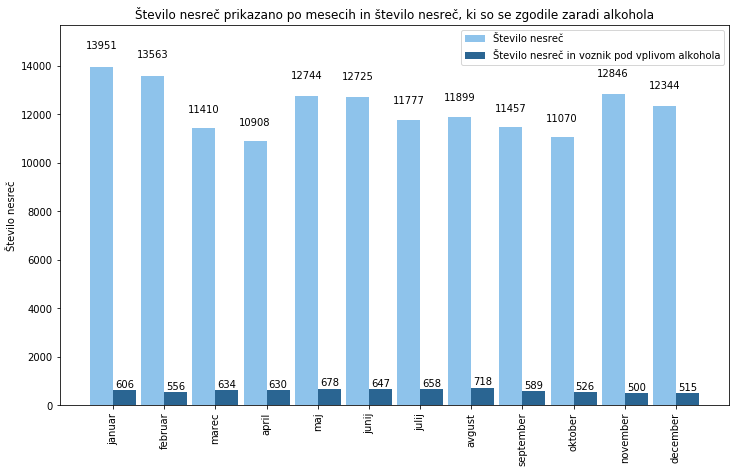

In [324]:
N=12
ind = np.arange(N)  # lokacije
width = 0.45      # širina

plt.figure(figsize=(12,7))
plt.margins(0.05, 0.125)
rects1 = plt.bar(ind, vse_nesrece_by_month_vektor, width, color='#8ec3eb')
rects2 = plt.bar(ind + width, nesrece_alkohol_releated_by_month_vektor, width, color='#2a6592')

plt.ylabel('Število nesreč')

plt.title('Število nesreč prikazano po mesecih in število nesreč, ki so se zgodile zaradi alkohola')
plt.xticks(ind + width / 2, meseci, rotation=90)

plt.legend((rects1[0], rects2[0]), ('Število nesreč', 'Število nesreč in voznik pod vplivom alkohola'))

# besedilo nad stolpci grafa
def autolabel(rects, array, delez=False):
    i = 0
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')
#         if delez:
#             plt.text(rect.get_x() + rect.get_width()/2., 2*height,
#                 '%.1f' % (array[i] * 100) + '%',
#                 ha='center', va='bottom')
#         i += 1
            

autolabel(rects1, delez_nesrec_z_alkoholom_po_mesecih)
autolabel(rects2, delez_nesrec_z_alkoholom_po_mesecih, True)

plt.show()

In [185]:
# Določim mejo za veliko škodo
prop_dmg_line = 5000

velika_skoda_meseci = defaultdict(int)

# Se sprehodim skozi nesreče in shranim ustrezne tudi po mesecih
high_property_damage = []
for crash in sorted(crashes1_alcohol_releated, key=lambda x: int(x[3]), reverse=True):
    datum = pd.DatetimeIndex([crash[0]])
    mesec = datum.month[0]
    
    if int(crash[3]) >= prop_dmg_line:
        velika_skoda_meseci[mesec] += 1
        high_property_damage.append(crash)
        
#     print(crash)

In [187]:
# print(np.median(high_property_damage))
# print(np.mean(high_property_damage))
# print(max(set(high_property_damage), key=high_property_damage.count))

In [196]:
velika_skoda_by_month_vektor = []
for key in sorted(velika_skoda_meseci):
#     print(key, alkohol_kolicina[key])
    velika_skoda_by_month_vektor.append(velika_skoda_meseci[key])

In [327]:
# print(nesrece_alkohol_releated_by_month_vektor)
# print(velika_skoda_by_month_vektor)
# print(delez_nesrec_z_alkoholom_po_mesecih)

In [328]:
delez_nesrec_z_alkoholom_in_veliko_skodo_po_mesecih = np.divide(velika_skoda_by_month_vektor,vse_nesrece_by_month_vektor)

In [366]:
# delez_nesrec_z_alkoholom_in_veliko_skodo_po_mesecih

In [365]:
# delez_nesrec_z_alkoholom_po_mesecih

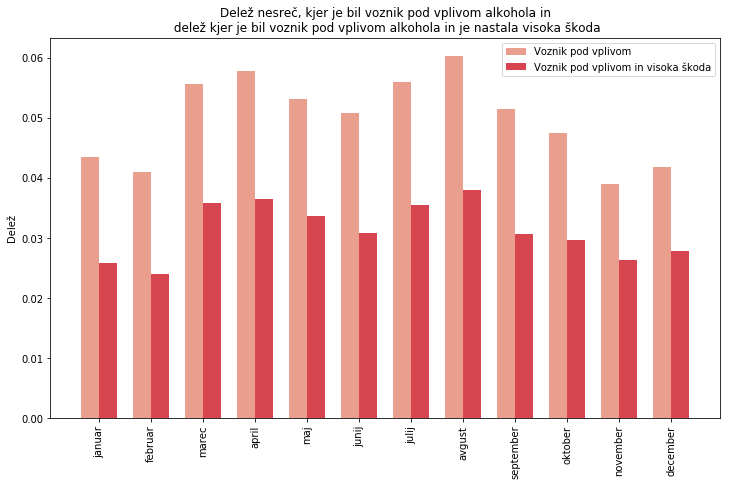

In [340]:
N=12
ind = np.arange(N)  # lokacije
width = 0.35      # širina

plt.figure(figsize=(12,7))
rects1 = plt.bar(ind, delez_nesrec_z_alkoholom_po_mesecih, width, color='#ea9e8d')
rects2 = plt.bar(ind + width, delez_nesrec_z_alkoholom_in_veliko_skodo_po_mesecih, width, color='#d64550')

plt.ylabel('Delež')

plt.title('Delež nesreč, kjer je bil voznik pod vplivom alkohola in\n delež kjer je bil voznik pod vplivom alkohola in je nastala visoka škoda')
plt.xticks(ind + width / 2, meseci, rotation=90)

plt.legend((rects1[0], rects2[0]), ('Voznik pod vplivom', 'Voznik pod vplivom in visoka škoda'))

# besedilo nad stolpci grafa
# def autolabel(rects):
#     for rect in rects:
#         height = rect.get_height()
#         plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
#                 '%.2f' % (height),
#                 ha='center', va='bottom')

# autolabel(rects1)
# autolabel(rects2)

plt.show()

In še predstavitev s absolutnimi številkami.

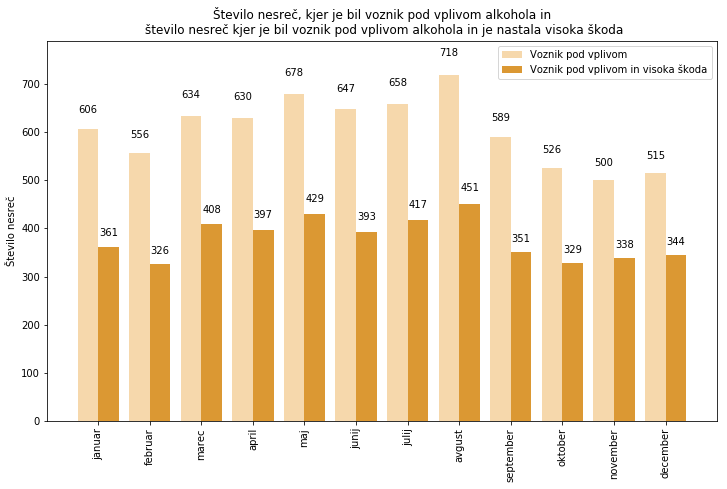

In [289]:
N=12
ind = np.arange(N)  # lokacije
width = 0.4      # širina

plt.figure(figsize=(12,7))
plt.margins(0.05, 0.1)
rects1 = plt.bar(ind, nesrece_alkohol_releated_by_month_vektor, width, color='#f6d8ac')
rects2 = plt.bar(ind + width, velika_skoda_by_month_vektor, width, color='#db9833')

plt.ylabel('Število nesreč')

plt.title('Število nesreč, kjer je bil voznik pod vplivom alkohola in\n število nesreč kjer je bil voznik pod vplivom alkohola in je nastala visoka škoda')
plt.xticks(ind + width / 2, meseci, rotation=90)

plt.legend((rects1[0], rects2[0]), ('Voznik pod vplivom', 'Voznik pod vplivom in visoka škoda'))

# besedilo nad stolpci grafa
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [363]:
ds = np.divide(velika_skoda_by_month_vektor,nesrece_alkohol_releated_by_month_vektor)
n = np.median(ds) * 100
print('Velika škoda nastane v {:.2f}% primerih.'.format(n))

Velika škoda nastane v 62.91% primerih.


In [364]:
m = (np.median(delez_nesrec_z_alkoholom_po_mesecih)) * 100
print('Delež nesreč, ki se zgodijo zaradi alkohola je v povprečju kar {:.2f}%.'.format(m))

Delež nesreč, ki se zgodijo zaradi alkohola je v povprečju kar 5.11%.


**Ugotovitve:**<br> 
Ugotovili smo, da se mesečno zgodi v povprečju 5.11% nesreč zaradi alkohola.<br> Pri teh pa kar v 62.91% primerih nastane velika škoda, ki smo jo določili za 5000$.